## Se prueba la optimización random (fuerza bruta)

Usamos la sala de prueba 1 (versión usando resolución de 2 Hz para encontrar la mejor sala).

In [1]:
import os
import time
os.chdir('..')

In [2]:
from room.geometry_generator import calculation_of_geometry
from mesh.mesh_3D_complex import create_complex_mesh
from FEM.FEM_source import FEM_Source_Solver_Average
from aux.merit_figure import merit_magnitude_deviation, merit_spatial_deviation
from plots.graph_room_outline import plot_room_outline

import numpy as np
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Definimos el cuarto
Lx = 250       # Largo de la sala en X 
Ly = 300       # Largo de la sala en Y
Lz = 220       # Alto de la sala
Dx = 50        # Delta X
Dy = 80        # Delta Y
Dz = 10        # Delta Z

# Posiciones fuente y receptor (en metros)
source_position = (1.9, 1.0, 1.3)
receptor_position = (1.25, 1.9, 1.2)

In [5]:
# Parametros de control
N = 250        # Densidad de la grilla del generador de geometrías
M = 200        # Cantidad de salas a generar
n_walls = 2    # Número de cortes en las paredes
res_freq = 2

In [6]:
room =  [[0.10416667, 0.        ],
        [0.44      ,0.55      ],
        [0.        ,1.43      ],
        [0.3125    ,3.        ],
        [2.1875    ,3.        ],
        [2.5       ,1.43      ],
        [2.06      ,0.55      ],
        [2.39583333,0.        ]]

Calculo misma respuesta con diferente resolución

In [8]:
from complex_outline_optim import solve_complex_geom
f_res = 2
merit_res_f2, mag_res_f2 = solve_complex_geom(Lx/100, Ly/100, Ly/100, Dx/100, Dy/100, source_position, receptor_position, room, res_freq=f_res)

f_res = 1
merit_res_f1, mag_res_f1 = solve_complex_geom(Lx/100, Ly/100, Ly/100, Dx/100, Dy/100, source_position, receptor_position, room, res_freq=f_res)

f_res = 0.5
merit_res_f05, mag_res_f05 = solve_complex_geom(Lx/100, Ly/100, Ly/100, Dx/100, Dy/100, source_position, receptor_position, room, res_freq=f_res)

Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 597 nodes
Info    : 3180 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1997 nodes
Info    : 11106 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entities
Info    : 6507 nodes
Info    : 38614 elements
Info    : Done reading 'mallado/room_mesh_complex3.msh'
Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 597 nodes
Info    : 3180 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1997 nodes
Info    : 11106 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entities
Info    : 6507 nodes
Info    : 38614 e

Comparación entre las dos respuestas (en frecuencia)

In [9]:
freqs_2 = np.arange(20, 200, 2)
freqs_1 = np.arange(20, 200, 1)
freqs_05 = np.arange(20, 200, 0.5)

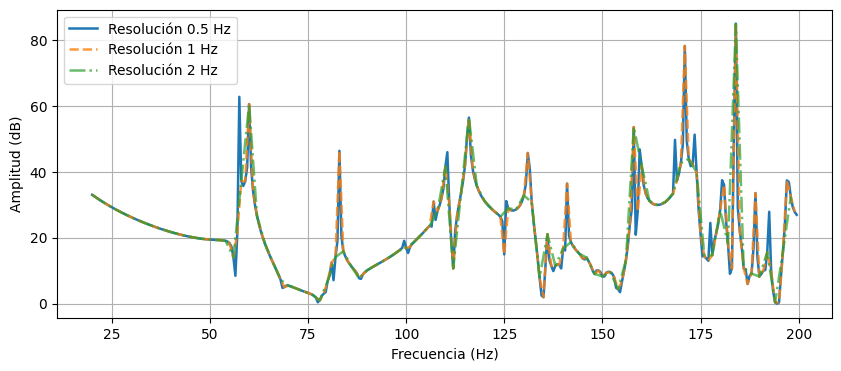

In [21]:
plt.figure("Resultado magnitud", figsize=(10, 4))
plt.plot(freqs_05, mag_res_f05, linewidth=1.8, label='Resolución 0.5 Hz')
plt.plot(freqs_1, mag_res_f1, '--', linewidth=1.8, label='Resolución 1 Hz', alpha=0.8)
plt.plot(freqs_2, mag_res_f2, '-.', linewidth=1.8, label='Resolución 2 Hz', alpha=0.7)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.legend()
plt.grid()
plt.show()


In [22]:
print("Merito 0.5 Hz: ", merit_res_f05)
print("Merito 1 Hz: ", merit_res_f1)
print("Merito 2 Hz: ", merit_res_f2)

Merito 0.5 Hz:  (17.979423680620982, 13.789031488587417, 4.190392192033566)
Merito 1 Hz:  (18.49648570594118, 14.349294371683559, 4.147191334257621)
Merito 2 Hz:  (19.07841429391022, 14.996757261219235, 4.081657032690986)
